In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from datetime import datetime, timedelta

# Regression: Days before and after NVDA earnings reports

## Specify parameters

In [2]:
# The file containing dates of NVDA's earnings reports
FILEPATH = "c:/Users/steve/Documents/"
FILENAME = "nvda_earnings_dates.csv"
# The start and end dates of the analysis period
start_date_string = "2017-12-01"
end_date_string = pd.Timestamp.today().strftime("%Y-%m-%d")

## Get data

In [3]:
# Get daily price data
nvda = yf.Ticker("NVDA")
daily_ohlc = nvda.history(start=start_date_string, end=end_date_string, interval="1D")

In [4]:
daily_ohlc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-01 00:00:00-05:00,49.300577,49.503411,47.608661,48.897385,81154800,0.0,0.0
2017-12-04 00:00:00-05:00,49.483620,49.545459,45.637230,46.171520,124084400,0.0,0.0
2017-12-05 00:00:00-05:00,45.117789,47.665560,44.667603,46.438675,98148800,0.0,0.0
2017-12-06 00:00:00-05:00,45.934067,47.032330,45.721341,46.814655,46703200,0.0,0.0
2017-12-07 00:00:00-05:00,47.482520,47.888184,47.027382,47.489941,54260000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-15 00:00:00-04:00,924.719971,948.619995,915.989990,946.299988,41773500,0.0,0.0
2024-05-16 00:00:00-04:00,949.099976,958.190002,941.030029,943.590027,32395200,0.0,0.0
2024-05-17 00:00:00-04:00,943.690002,947.400024,918.059998,924.789978,35969100,0.0,0.0


## Identify the NVDA earnings dates

In [5]:
# Read the NVDA earnings dates
report_df = pd.read_csv(FILEPATH + FILENAME)

In [6]:
# Since the data from yfinance is localized to US Eastern time, set up
# a DateTimeIndex on the NVDA earnings dates that is also localized to US Eastern time.
# Doing this is necessary for the join later to work.
report_df['Earnings_Date'] = pd.to_datetime(report_df['Date']).dt.tz_localize("US/Eastern")
report_df.set_index(report_df['Earnings_Date'], inplace=True)

In [7]:
report_df

,Date,Earnings_Date
Earnings_Date,,
2016-05-12 00:00:00-04:00,5/12/2016,2016-05-12 00:00:00-04:00
2016-08-11 00:00:00-04:00,8/11/2016,2016-08-11 00:00:00-04:00
2016-11-10 00:00:00-05:00,11/10/2016,2016-11-10 00:00:00-05:00
2017-02-09 00:00:00-05:00,2/9/2017,2017-02-09 00:00:00-05:00
2017-05-09 00:00:00-04:00,5/9/2017,2017-05-09 00:00:00-04:00
2017-08-10 00:00:00-04:00,8/10/2017,2017-08-10 00:00:00-04:00
2017-11-09 00:00:00-05:00,11/9/2017,2017-11-09 00:00:00-05:00
2018-02-08 00:00:00-05:00,2/8/2018,2018-02-08 00:00:00-05:00
2018-05-10 00:00:00-04:00,5/10/2018,2018-05-10 00:00:00-04:00


### Join the price data with the earnings report dates

In [8]:
# Join NVDA earnings dates with the S&P 500 data
analysis_df = pd.merge(daily_ohlc['Close'], report_df, how = "left", left_index=True, right_index=True)[
    ['Close', 'Earnings_Date']]

In [9]:
analysis_df[-72:-52]

,Close,Earnings_Date
Date,,
2024-02-08 05:00:00+00:00,696.377319,NaT
2024-02-09 05:00:00+00:00,721.296204,NaT
2024-02-12 05:00:00+00:00,722.446106,NaT
2024-02-13 05:00:00+00:00,721.246216,NaT
2024-02-14 05:00:00+00:00,738.965332,NaT
2024-02-15 05:00:00+00:00,726.545959,NaT
2024-02-16 05:00:00+00:00,726.095947,NaT
2024-02-20 05:00:00+00:00,694.487427,NaT
2024-02-21 05:00:00+00:00,674.688293,2024-02-21 00:00:00-05:00


In [10]:
analysis_df['log_return'] = np.log(analysis_df['Close']) - np.log(analysis_df['Close'].shift(1))

In [11]:
analysis_df[-72:-52]

,Close,Earnings_Date,log_return
Date,,,
2024-02-08 05:00:00+00:00,696.377319,NaT,-0.006555
2024-02-09 05:00:00+00:00,721.296204,NaT,0.035158
2024-02-12 05:00:00+00:00,722.446106,NaT,0.001593
2024-02-13 05:00:00+00:00,721.246216,NaT,-0.001662
2024-02-14 05:00:00+00:00,738.965332,NaT,0.024270
2024-02-15 05:00:00+00:00,726.545959,NaT,-0.016949
2024-02-16 05:00:00+00:00,726.095947,NaT,-0.000620
2024-02-20 05:00:00+00:00,694.487427,NaT,-0.044508
2024-02-21 05:00:00+00:00,674.688293,2024-02-21 00:00:00-05:00,-0.028923


In [12]:
# All earnings reports since 2017 appear to have been announced after the close
# Therefore designate the following day as the day the response to earnings occurs
analysis_df['earnings_reaction_day'] = pd.notnull(analysis_df['Earnings_Date'].shift(1))

In [13]:
analysis_df[-71:-51]

,Close,Earnings_Date,log_return,earnings_reaction_day
Date,,,,
2024-02-09 05:00:00+00:00,721.296204,NaT,0.035158,False
2024-02-12 05:00:00+00:00,722.446106,NaT,0.001593,False
2024-02-13 05:00:00+00:00,721.246216,NaT,-0.001662,False
2024-02-14 05:00:00+00:00,738.965332,NaT,0.024270,False
2024-02-15 05:00:00+00:00,726.545959,NaT,-0.016949,False
2024-02-16 05:00:00+00:00,726.095947,NaT,-0.000620,False
2024-02-20 05:00:00+00:00,694.487427,NaT,-0.044508,False
2024-02-21 05:00:00+00:00,674.688293,2024-02-21 00:00:00-05:00,-0.028923,False
2024-02-22 05:00:00+00:00,785.343140,NaT,0.151870,True


In [14]:
analysis_df['previous_day_log_return'] = analysis_df['log_return'].shift(1)

In [15]:
analysis_df[-72:-52]

,Close,Earnings_Date,log_return,earnings_reaction_day,previous_day_log_return
Date,,,,,
2024-02-08 05:00:00+00:00,696.377319,NaT,-0.006555,False,0.027127
2024-02-09 05:00:00+00:00,721.296204,NaT,0.035158,False,-0.006555
2024-02-12 05:00:00+00:00,722.446106,NaT,0.001593,False,0.035158
2024-02-13 05:00:00+00:00,721.246216,NaT,-0.001662,False,0.001593
2024-02-14 05:00:00+00:00,738.965332,NaT,0.024270,False,-0.001662
2024-02-15 05:00:00+00:00,726.545959,NaT,-0.016949,False,0.024270
2024-02-16 05:00:00+00:00,726.095947,NaT,-0.000620,False,-0.016949
2024-02-20 05:00:00+00:00,694.487427,NaT,-0.044508,False,-0.000620
2024-02-21 05:00:00+00:00,674.688293,2024-02-21 00:00:00-05:00,-0.028923,False,-0.044508


## Find the correlation between price changes on the trading days immediately before and after the earnings report

### Select the earnings reaction days

In [16]:
reaction_days = analysis_df[(analysis_df['earnings_reaction_day'] == True)]

In [17]:
reaction_days

,Close,Earnings_Date,log_return,earnings_reaction_day,previous_day_log_return
Date,,,,,
2018-02-09 05:00:00+00:00,57.406452,NaT,0.064791,True,-0.050557
2018-05-11 04:00:00+00:00,62.998722,NaT,-0.021763,True,0.016864
2018-08-17 04:00:00+00:00,60.632874,NaT,-0.050263,True,-0.006350
2018-11-16 05:00:00+00:00,40.745518,NaT,-0.207712,True,0.026029
2019-02-15 05:00:00+00:00,39.027637,NaT,0.018021,True,0.010735
2019-05-17 04:00:00+00:00,38.866730,NaT,-0.023113,True,0.003815
2019-08-16 04:00:00+00:00,39.664303,NaT,0.070018,True,-0.008700
2019-11-15 05:00:00+00:00,50.808933,NaT,-0.027056,True,0.005832
2020-02-14 05:00:00+00:00,72.162117,NaT,0.067850,True,-0.006479


Statistics of the earnings reaction days

In [18]:
reaction_days['log_return'].describe()

count    25.000000
mean      0.016503
std       0.084092
min      -0.207712
25%      -0.023113
50%       0.000997
75%       0.064791
max       0.218088
Name: log_return, dtype: float64

### Regression: earnings reaction day vs. the previous day

The previous day's return is the independent (x) variable for the regression.

Convert the x values to a two-dimensional array (i.e., one column with many rows as necessary).

In [19]:
x = np.array(reaction_days['previous_day_log_return']).reshape((-1, 1))

In [20]:
x

array([[-0.05055748],
       [ 0.01686427],
       [-0.00635031],
       [ 0.02602893],
       [ 0.01073511],
       [ 0.00381539],
       [-0.00870018],
       [ 0.0058323 ],
       [-0.00647888],
       [-0.02195039],
       [-0.01002084],
       [ 0.00048463],
       [ 0.02493043],
       [ 0.0033335 ],
       [-0.02171606],
       [-0.03168566],
       [ 0.00060366],
       [ 0.04957399],
       [ 0.00238354],
       [-0.04642282],
       [ 0.00478152],
       [-0.00489986],
       [ 0.03121491],
       [-0.00926737],
       [-0.02892326]])

And the earnings reaction day's return is the dependent (y) variable.

In [21]:
y = np.array(reaction_days['log_return'])

In [22]:
y

array([ 6.47914334e-02, -2.17631973e-02, -5.02633669e-02, -2.07711574e-01,
        1.80207003e-02, -2.31132397e-02,  7.00183845e-02, -2.70559188e-02,
        6.78500780e-02,  2.82016725e-02,  2.06039985e-04,  8.55536032e-04,
       -8.57520102e-02, -1.35948643e-02,  3.90388709e-02,  7.92720324e-02,
       -7.86008917e-02,  5.03176446e-02,  3.93391148e-02, -1.47532718e-02,
        1.31216025e-01,  2.18087830e-01,  9.97000953e-04, -2.48948108e-02,
        1.51869946e-01])

In [23]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                              3.590
Date:                Wed, 22 May 2024   Prob (F-statistic):                      0.0702
Time:                        21:33:46   Log-Likelihood:                          28.184
No. Observations:                  25   AIC:                                     -54.37
Df Residuals:                      24   BIC:                                     -53.15
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

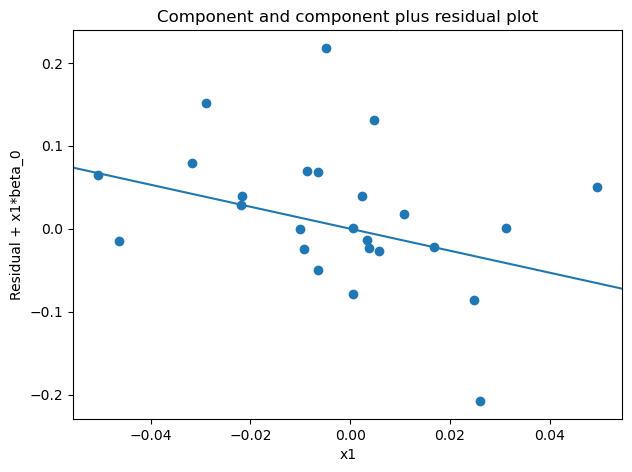

In [24]:
fig = sm.graphics.plot_ccpr(results, "x1")
fig.tight_layout(pad=1.0)